# Seminar 1

Uz pomoć .fna datoteke iz kraken baze gradim svoju vlastitu. Kako bi to napravila morala sam svaku sekvencu odvojiti u zaseban file. Nakon pisanja python skripte dobila sam 2187 datoteka sastavljenih od 75 različitih taxid-eva. Za pokretanje skani alata dodatno sam nasumično subsamplala readove, s broja 2588006 na 10000. Konačno, dobivene rezultate spremila sam u 'skani_results_file.tsv'. Također, provela sam i klasifikaciju s krakenom, a izlaz sam postavila u 'kraken_output.tsv' datoteku.

### Evaluacija

In [182]:
import matplotlib.pyplot as plt
import pandas as pd

In [183]:
putanja_do_skani_datoteke = 'skani_results_file.tsv'
df = pd.read_csv(putanja_do_skani_datoteke, sep='\t')

In [184]:
odabrani_stupci = ['Align_fraction_query', 'Ref_name', 'Query_name','Query_file']
df_odabrani = df[odabrani_stupci]
tablica = list(df_odabrani.iloc)
pom = 0
rjecnik = {}
for i in tablica:
  ref_name = i[0].split('|')[0]
  ref_taxid = i[0].split(' ')[0].split('|')[-1]
  query_id = i[1].split(',')[0].split(' ')[0]
  query_name = i[1].split(',')[0].split(' ')[-1]
  query_speciesid = i[2].split('|')[3]
  ani_score = i[-1]
  if query_speciesid != ref_taxid:
    pom += 1
  if (ref_name, ref_taxid) in rjecnik:
    ubaci = [ani_score, query_speciesid, query_name, query_id]
    rjecnik[(ref_name, ref_taxid)].append(ubaci)
  else:
    ubaci = [ani_score, query_speciesid, query_name, query_id]
    rjecnik[(ref_name, ref_taxid)] = [ubaci]
print(f'Učitanih rezultata ima {len(tablica)}!')
print(f'Postoji {pom} redova s različito određenim taxid-evima. ({round((pom/len(tablica))*100,2)}%)')

Učitanih rezultata ima 76389!
Postoji 3882 redova s različito određenim taxid-evima. (5.08%)


In [185]:
novi = {}
for k,v in rjecnik.items():
  rjecnik[k] = sorted(v, key=lambda x: x[0], reverse=True)
  novi[k] = rjecnik[k][0]
print(f'Daljnjom analizom primjećujem da se ispisani retci odnose na {len(list(rjecnik.items()))} početnih .fna datoteka, tj. za njih {2187-len(list(rjecnik.items()))} vrijedi da je ANI-score manji od 80%')

Daljnjom analizom primjećujem da se ispisani retci odnose na 2129 početnih .fna datoteka, tj. za njih 58 vrijedi da je ANI-score manji od 80%


Fali zapis za:

*   1 datoteku s taxid-om 1352
*   55 datoteka s taxid-om 1491
*   2 datoteke s taxid-om 28132



In [186]:
putanja_do_kraken_datoteke = 'kraken_output.tsv'
df = pd.read_csv(putanja_do_kraken_datoteke, sep='\t')

In [187]:
neklasificirani = []
klasificirani = {}

with open(putanja_do_kraken_datoteke, 'r') as file:
  for red in file:
    podaci = red.split('\t')
    if podaci[0] == 'U':
      neklasificirani.append(podaci[1])
    elif podaci[0] == 'C':
      klasificirani[podaci[1]] = podaci[2].split(')')[0].split(' ')[-1]

print(f'Od ukupno 10000 sekvenci, njih {len(klasificirani)} se uspješno klasificiralo, dok je {len(neklasificirani)} ostalo neklasificirano.')

Od ukupno 10000 sekvenci, njih 8283 se uspješno klasificiralo, dok je 1717 ostalo neklasificirano.


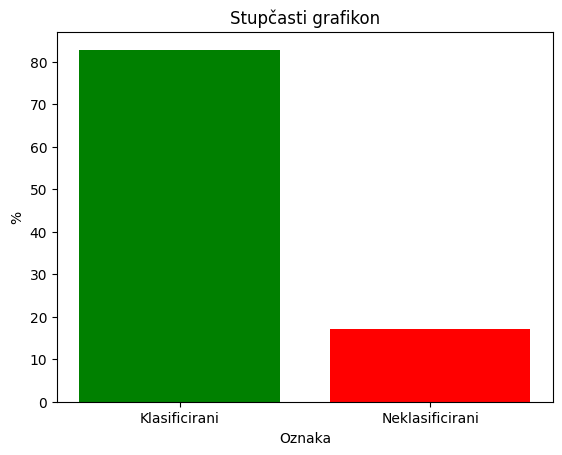

In [188]:
vrijednosti = [len(klasificirani)/100, len(neklasificirani)/100]
indeksi = ['Klasificirani', 'Neklasificirani']
plt.bar(indeksi, vrijednosti, color=['green', 'red'])
plt.xlabel('Oznaka')
plt.ylabel('%')
plt.title('Stupčasti grafikon')
plt.show()

In [189]:
print(novi)

{('NC_009515.1', '2173'): [99.13, '2173', 'NZ_CP117965.1', 'd3b5b629-65a6-f210-8813-1768ee2875bd'], ('NZ_CP028107.1', '859'): [99.05, '859', 'NZ_CP034842.1', 'b675bebd-1f56-eef1-4003-cd8e630267ab'], ('NZ_CP033837.1', '859'): [99.05, '859', 'NZ_CP034842.1', 'd44627a2-95c4-5060-4fb9-e1357df145c9'], ('NZ_CP019306.1', '859'): [99.05, '859', 'NZ_CP034842.1', 'b675bebd-1f56-eef1-4003-cd8e630267ab'], ('NZ_CP058603.1', '1681'): [98.92, '1681', 'NZ_AP018132.1', 'b9c32cff-6e8e-6faa-b9bd-c05f32199a32'], ('NZ_CP010412.1', '1681'): [98.27, '1681', 'NZ_AP018132.1', 'c69ba55a-77cf-68a0-386e-37f2d9d34cf9'], ('NZ_AP012323.1', '1681'): [98.44, '1681', 'NZ_AP018132.1', '6e7112c0-f46c-b411-3804-e8a3f46ed012'], ('NZ_CP069279.1', '1681'): [98.27, '1681', 'NZ_AP018132.1', 'c69ba55a-77cf-68a0-386e-37f2d9d34cf9'], ('NZ_CP118071.1', '1681'): [98.92, '1681', 'NZ_AP018132.1', 'b9c32cff-6e8e-6faa-b9bd-c05f32199a32'], ('NC_014616.1', '1681'): [98.44, '1681', 'NZ_AP018132.1', 'b9c32cff-6e8e-6faa-b9bd-c05f32199a32'],

In [190]:
TP = 0
FP = 0
for k,v in novi.items():
  if k[1] != v[1]:
    if v[3] in klasificirani:
      if klasificirani[v[3]] == k[1]:
        FP += 1
      elif klasificirani[v[3]] == v[1]:
        TP += 1
      else:
        FP += 1
  else:
    if v[3] in klasificirani:
      if klasificirani[v[3]] == v[1]:
        TP += 1
      else:
        FP += 1
print(f'TP: {TP}')
print(f'FP: {FP}')

TP: 2113
FP: 16
